<a href="https://colab.research.google.com/github/juberijuber/Image-Classification/blob/main/Image%20Classification%20using_our_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


Image augementation techniques:


1.image rotation
2.image shifting
3.image scaling
4.image flipping
5.image noising
6.image blurring




In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
x_train=train_datagen.flow_from_directory(r"D:/Projects/Image-Classification/Datasets/testset",
target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory(r"D:/Projects/Image-Classification/Datasets/testset",
target_size=(64,64),batch_size=3249,class_mode="categorical")

Found 640 images belonging to 5 classes.
Found 640 images belonging to 5 classes.


In [10]:
print(x_train.class_indices)


{'bears': 0, 'crows': 1, 'elephants': 2, 'racoons': 3, 'rats': 4}


In [11]:
model=Sequential()

In [12]:
#adding convolution layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))



C:\Users\JUBER B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))


In [14]:
#input layer of ann
model.add(Flatten())
#add hidden layer(no.of neurons,activation=relu,weights)
model.add(Dense(units=128,activation="relu"))
#add output layer(no.of output classes=5,activation function=softmax)
model.add(Dense(units=5,activation="softmax"))


In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,937,925 (15.02 MB)

 Trainable params: 3,937,925 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#configure the learning process(loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
history=model.fit(x_train,steps_per_epoch=10,epochs=10,validation_data=x_test,validation_steps=20)


C:\Users\JUBER B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4411 - loss: 2.1270 - val_accuracy: 0.6031 - val_loss: 1.4807
Epoch 2/10
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6562 - loss: 1.2360

C:\Users\JUBER B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.5902 - loss: 1.2752 - val_accuracy: 0.6031 - val_loss: 1.2822
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.6726 - loss: 1.0736 - val_accuracy: 0.6078 - val_loss: 1.1174
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.6042 - loss: 1.0592 - val_accuracy: 0.6203 - val_loss: 1.0656
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.6432 - loss: 0.9623 - val_accuracy: 0.6391 - val_loss: 0.9552
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.6837 - loss: 0.8456 - val_accuracy: 0.7359 - val_loss: 0.7399
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.6667 - loss: 0.8060 - val_accuracy: 0.7266 - val_loss: 0.7566
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.6530 - loss: 0.9448 - val_accuracy: 0.7734 - val_loss: 0.6671
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.6996 - loss: 0.7801 - val_accuracy: 0.7406 - val_

In [18]:
model.save("animal.h5")


In [19]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [20]:
model=load_model("animal.h5")

In [50]:
img = image.load_img(r"D:\Projects\Image-Classification\Datasets\testset\bears\2Q__ (18).jpeg", target_size=(64, 64))

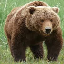

In [51]:
img


In [52]:
x=image.img_to_array(img)


In [53]:
 x.shape

(64, 64, 3)

1. Even if you are predicting a single image, the model still expects the input to be in a batch format
2. The shape of the input data for a Keras model should be (batch_size, height, width, channels).


In [54]:
x=np.expand_dims(x,axis=0)

In [55]:
x.shape

(1, 64, 64, 3)

In [56]:
y=model.predict(x)
pred=y.argmax( axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [57]:
y


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [58]:
pred


array([0], dtype=int64)

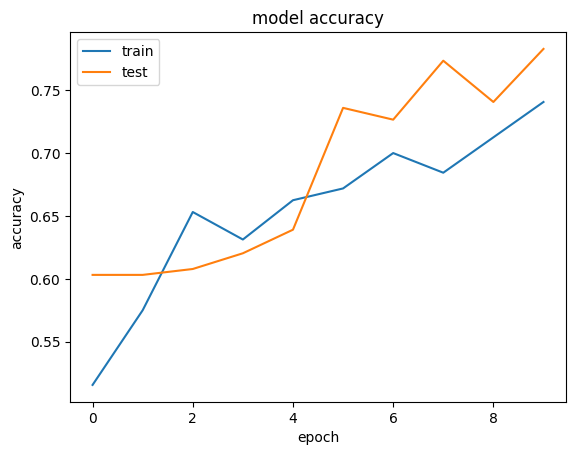

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

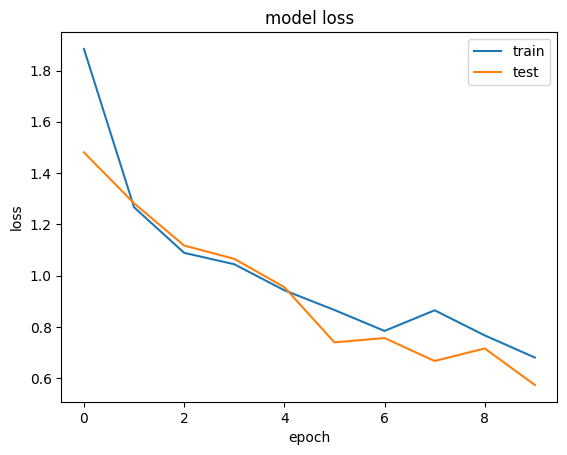

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
pred_multilabel = mlb.fit_transform(pred.reshape(-1, 1))  # Reshape if 'pred' is 1D
y_multilabel = mlb.transform(y.argmax(axis=1).reshape(-1, 1))  # Binarize y

# Now you can try calculating the accuracy score again:
accuracy = accuracy_score(y_multilabel, pred_multilabel)

print(accuracy)




1.0


In [62]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'racoons': 3, 'rats': 4}

In [63]:
index=['bears', 'crows', 'elephants', 'racoons', 'rats']
result=str(index[pred[0]])

In [64]:
result


'bears'